# import libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy import stats
from scipy.special import inv_boxcox

/Users/shengnan/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# import data

In [3]:
df = pd.read_csv('Car details v3.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [7]:
df.describe(include='object') 

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,8128,8128,8128,8128,8128,7907,7907,7913,7906
unique,2058,4,3,2,5,393,121,322,441
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,129,4402,6766,7078,5289,225,1017,377,530


# data processing

In [11]:
#### convert manufacture year to Age
df.insert(0, "Age", df["year"].max()+1-df["year"] )
df.drop('year',axis=1,inplace=True)
df.head()

,Age,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,7,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,7,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,15,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,11,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,14,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [18]:
#remove same funcion cols
df.drop('name',axis=1,inplace=True)
df.drop('torque',axis=1,inplace=True) # similar with max_power
df.drop('mileage',axis=1,inplace=True) # same with km_driven

In [55]:
# convert engine and max_power to numeric values
df.engine=df.engine.str.extract('(\d+)')
df.max_power=df.max_power.str.extract('(\d+)')
df.engine = pd.to_numeric(df['engine'])
df.max_power = pd.to_numeric(df['max_power'])

In [64]:
OrderedCols = np.concatenate([df.select_dtypes(exclude='object').columns.values, 
                              df.select_dtypes(include='object').columns.values])

In [65]:
for i,col in enumerate(OrderedCols):
    print(i,col)

0 Age
1 selling_price
2 km_driven
3 engine
4 max_power
5 seats
6 fuel
7 seller_type
8 transmission
9 owner


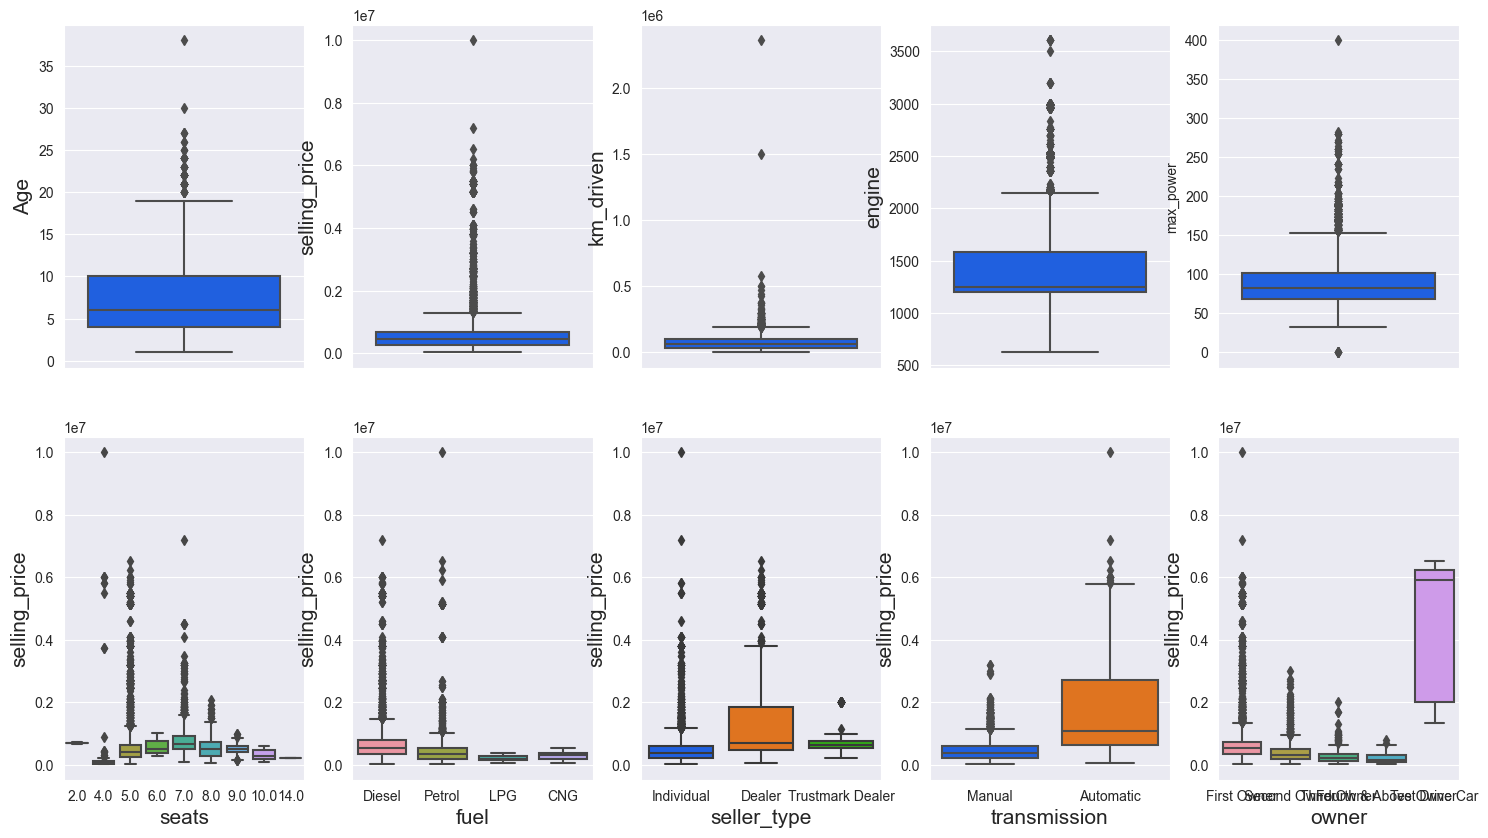

In [71]:
# 2X5 visual plot - 1st row numeric cols dist; 2nd row categorical cols vs. selling price
# identify outliers
sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(2, 5, figsize=(18,10),dpi=100)
for i,col in enumerate(OrderedCols):
    if i in [0,1,2,3,4]:
#         print(i//5,i%5)
        sns.boxplot(data=df,y=col,ax=ax[i//5,i%5])
        ax[i//4,i%4].yaxis.label.set_size(15)
    elif i in [5,6,7,8,9]:
#         print(i//5,i%5)
        sns.boxplot(data=df, x=col, y='selling_price', ax=ax[i//5,i%5])
        ax[i//5,i%5].xaxis.label.set_size(15)
        ax[i//5,i%5].yaxis.label.set_size(15)

In [129]:
outliers_indexes = []
target = 'selling_price'

for col in df.select_dtypes(include='object').columns:
    for cat in df[col].unique():
        df1 = df[df[col] == cat]
        q1 = df1[target].quantile(0.25)
        q3 = df1[target].quantile(0.75)
        iqr = q3-q1
        maximum = q3 + (1.5 * iqr)
        minimum = q1 - (1.5 * iqr)
        outlier_samples = df1[(df1[target] < minimum) | (df1[target] > maximum)]
        outliers_indexes.extend(outlier_samples.index.tolist())

In [130]:
for col in df.select_dtypes(exclude='object').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    maximum = q3 + (1.5 * iqr)
    minimum = q1 - (1.5 * iqr)
    outlier_samples = df[(df[col] < minimum) | (df[col] > maximum)]
    outliers_indexes.extend(outlier_samples.index.tolist())

In [115]:
outliers_indexes = list(set(outliers_indexes)) #return unique index
print('{} outliers were identified, whose indices are:\n\n{}'.format(len(outliers_indexes), outliers_indexes))

1135 outliers were identified, whose indices are:

[4097, 4, 4101, 7, 4108, 2062, 2065, 4114, 2069, 6166, 6167, 6168, 2072, 7332, 6171, 28, 6170, 4127, 4131, 6180, 6181, 35, 6184, 41, 4136, 2091, 4142, 47, 49, 6195, 51, 55, 7338, 57, 58, 59, 60, 2109, 2106, 6212, 6213, 6215, 6217, 75, 6220, 4175, 80, 2129, 82, 2131, 4179, 4180, 2134, 2135, 2137, 89, 2140, 6238, 4192, 4195, 4196, 6250, 4202, 108, 2155, 110, 6255, 2159, 2154, 6258, 106, 6260, 4208, 4214, 4215, 4216, 4217, 4219, 4220, 131, 132, 133, 134, 6279, 136, 137, 138, 4234, 4236, 141, 140, 4239, 4233, 145, 146, 139, 148, 149, 142, 151, 6296, 6297, 4248, 4249, 156, 4252, 158, 4255, 4256, 4257, 4253, 163, 4260, 165, 166, 167, 6308, 2474, 170, 4259, 4269, 4270, 2223, 6318, 4273, 6317, 6323, 2229, 4278, 6327, 184, 2234, 187, 186, 2239, 6337, 195, 2245, 4299, 4308, 6364, 4319, 4320, 4321, 4322, 6371, 4324, 4325, 234, 4334, 4335, 4338, 6392, 4344, 250, 4352, 257, 4355, 4356, 4358, 264, 265, 4364, 268, 6414, 6416, 6417, 6418, 4372, 4375, 

29


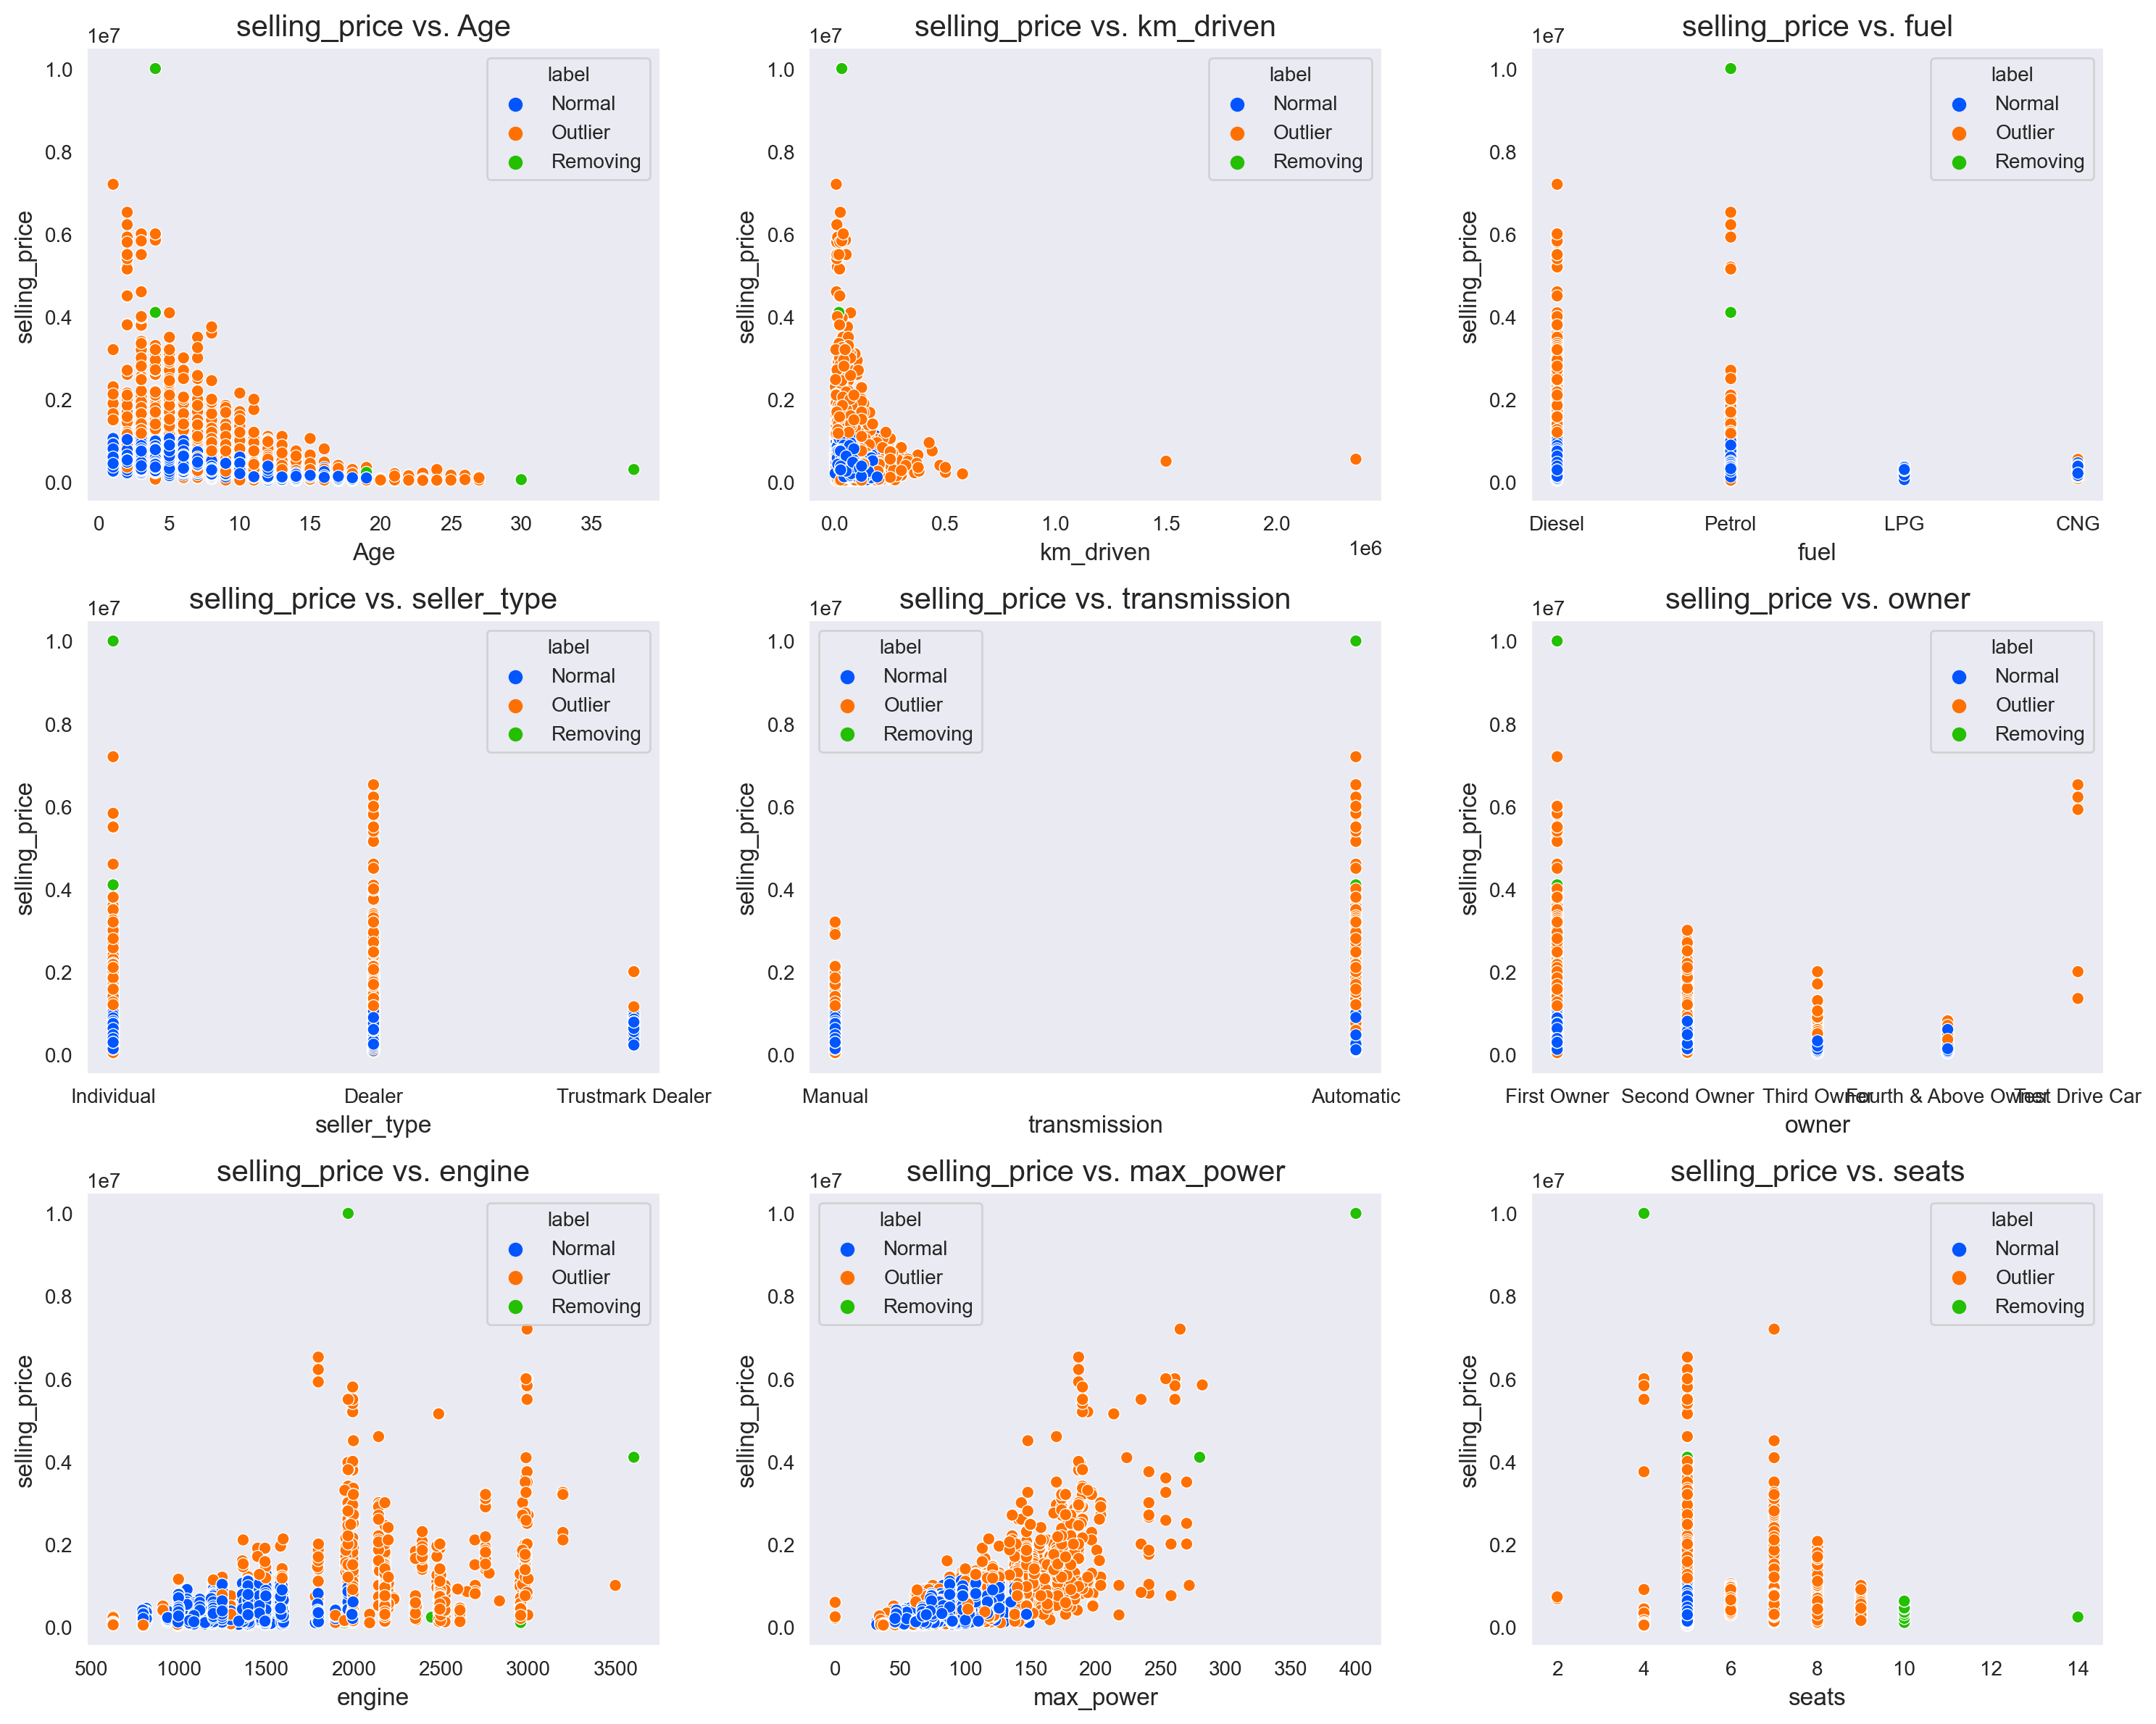

In [140]:
# Outliers Labeling
df1 = df.copy()
df1['label'] = 'Normal'
df1.loc[outliers_indexes,'label'] = 'Outlier'

# Removing Outliers
removing_indexes = []
removing_indexes.extend(df1[df1[target]>10000000].index)
removing_indexes.extend(df1[df1['Age']>=30].index)
removing_indexes.extend(df1[df1['km_driven']>15000000].index)
removing_indexes.extend(df1[df1['engine']>=3500].index)
removing_indexes.extend(df1[df1['max_power']>=400].index)
removing_indexes.extend(df1[df1['seats']>=10].index)
df1.loc[removing_indexes,'label'] = 'Removing'
print(len(set(removing_indexes))) #29

# Plot
target = 'selling_price'
features = df.columns.drop(target)
colors = ['#0055ff','#ff7000','#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(nrows=3 ,ncols=3, figsize=(15,12), dpi=200)

for i in range(len(features)):
    x=i//3
    y=i%3
    sns.scatterplot(data=df1, x=features[i], y=target, hue='label', ax=ax[x,y])
    ax[x,y].set_title('{} vs. {}'.format(target, features[i]), size = 15)
    ax[x,y].set_xlabel(features[i], size = 12)
    ax[x,y].set_ylabel(target, size = 12)
    ax[x,y].grid()

# ax[2, 1].axis('off')
# ax[2, 2].axis('off')
plt.tight_layout()
plt.show()

In [142]:
# drop outliers
removing_indexes
df1 = df.copy()
df1.drop(removing_indexes, inplace=True)
df1.reset_index(drop=True, inplace=True) #removed 29 outliers

In [148]:
# drop null values
df1.isnull().sum()
df1.dropna(axis=0,inplace=True)

Age                0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
engine           219
max_power        214
seats            219
dtype: int64

In [151]:
# drop duplicates
df1.drop_duplicates(inplace=True)

# EDA

In [215]:
df1.seats = df1.seats.apply(str)

In [216]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6661 entries, 0 to 8096
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            6661 non-null   int64  
 1   selling_price  6661 non-null   int64  
 2   km_driven      6661 non-null   int64  
 3   fuel           6661 non-null   object 
 4   seller_type    6661 non-null   object 
 5   transmission   6661 non-null   object 
 6   owner          6661 non-null   object 
 7   engine         6661 non-null   float64
 8   max_power      6661 non-null   float64
 9   seats          6661 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 572.4+ KB


## categorical columns

In [217]:
CatCols = list(df1.select_dtypes(include=object).columns.values)

In [218]:
CatCols

['fuel', 'seller_type', 'transmission', 'owner', 'seats']

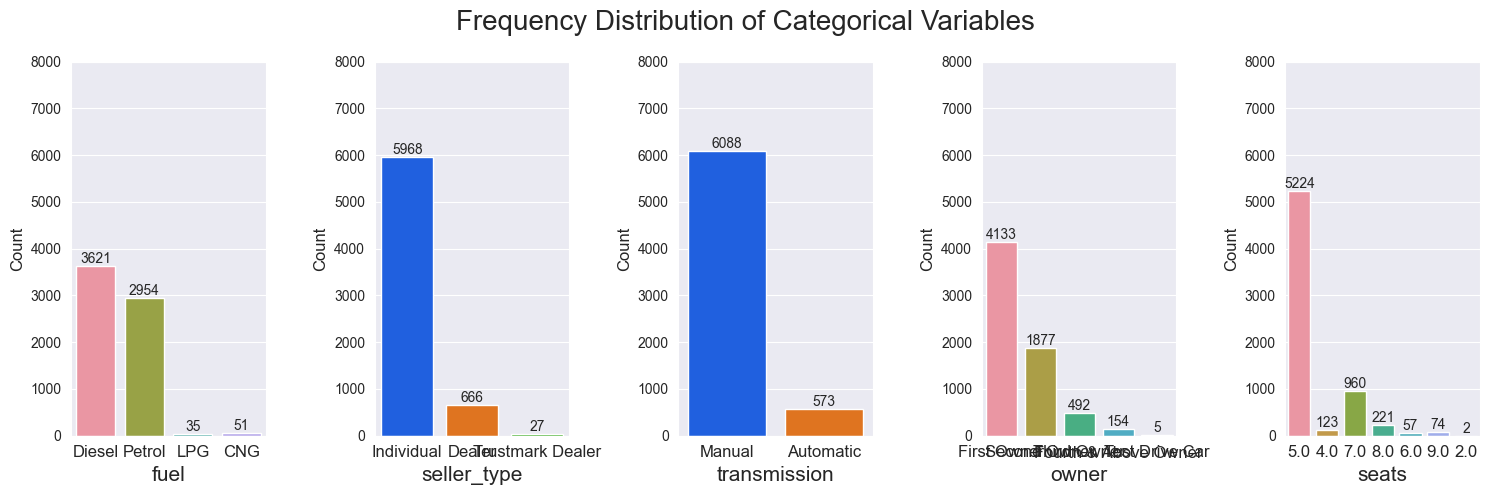

In [234]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,5), dpi=100)
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))
       
for i in range(len(CatCols)):
    graph = sns.countplot(x=CatCols[i], data=df1, ax=ax[i])
    ax[i].set_xlabel(CatCols[i], fontsize=15)
    ax[i].set_ylabel('Count', fontsize=12)
    ax[i].set_ylim([0,8000])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize=12)
    for cont in graph.containers:
        graph.bar_label(cont)

plt.suptitle('Frequency Distribution of Categorical Variables', fontsize=20) 
plt.tight_layout()
plt.show()

In [262]:
from matplotlib import cm

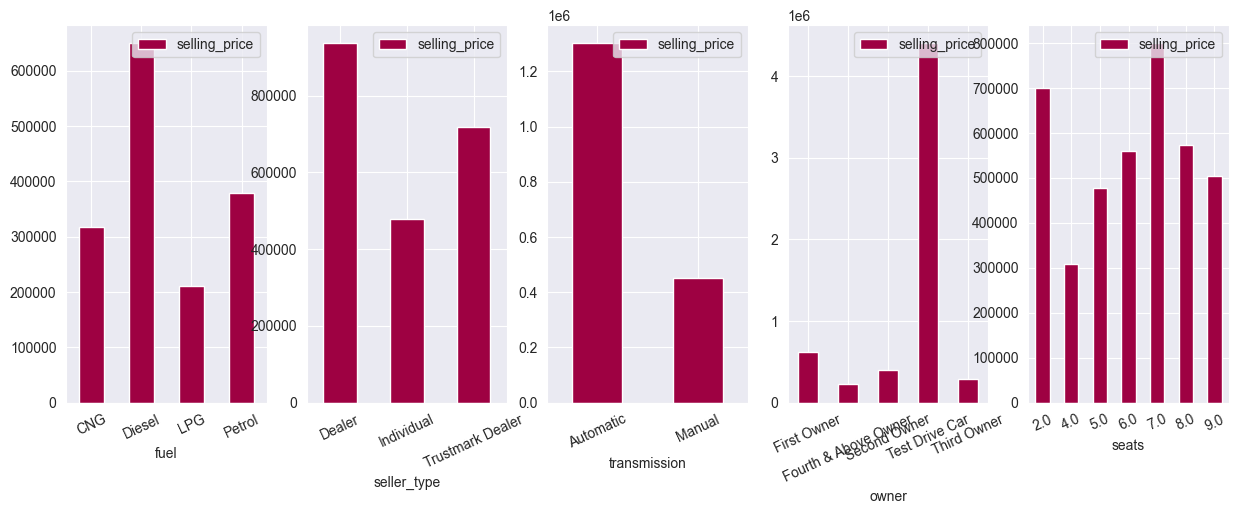

In [266]:
cols_name = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,5), dpi=100)
for i in range(len(cols_name)):
    df1[[cols_name[i],'selling_price']].groupby(cols_name[i]).mean().plot(kind='bar',rot=25,ax=ax[i],colormap=cm.get_cmap('Spectral'))

In [220]:
# selling price by fuel
df1[['fuel','selling_price']].groupby(['fuel']).median().round()

,selling_price
fuel,
CNG,330000.0
Diesel,530000.0
LPG,200000.0
Petrol,320000.0


In [221]:
# selling price by seller_type
df1[['selling_price','seller_type']].groupby(['seller_type']).median().round()
# diff between dealer and individual is more significant than dealer vs. trustmark dealer

,selling_price
seller_type,
Dealer,625000.0
Individual,400000.0
Trustmark Dealer,650000.0


In [268]:
# selling price by transmission
df1[['selling_price','transmission']].groupby(['transmission']).median().round()

,selling_price
transmission,
Automatic,850000.0
Manual,400000.0


In [267]:
# selling price by transmission
df1[['selling_price','owner']].groupby(['owner']).median().round()

,selling_price
owner,
First Owner,500000.0
Fourth & Above Owner,185000.0
Second Owner,320000.0
Test Drive Car,5923000.0
Third Owner,229999.0


In [224]:
# selling price by transmission
df1[['selling_price','seats']].groupby(['seats']).median().round()
# 2 seats cars are sports car
# 7 seats cars are van

,selling_price
seats,
2.0,700500.0
4.0,65000.0
5.0,380000.0
6.0,480000.0
7.0,675000.0
8.0,500000.0
9.0,505000.0


## numeric columns

In [225]:
list(df1.select_dtypes(exclude=object).columns.values)

['Age', 'selling_price', 'km_driven', 'engine', 'max_power']

In [226]:
NumCols = list(list(df1.select_dtypes(exclude=object).columns.values))

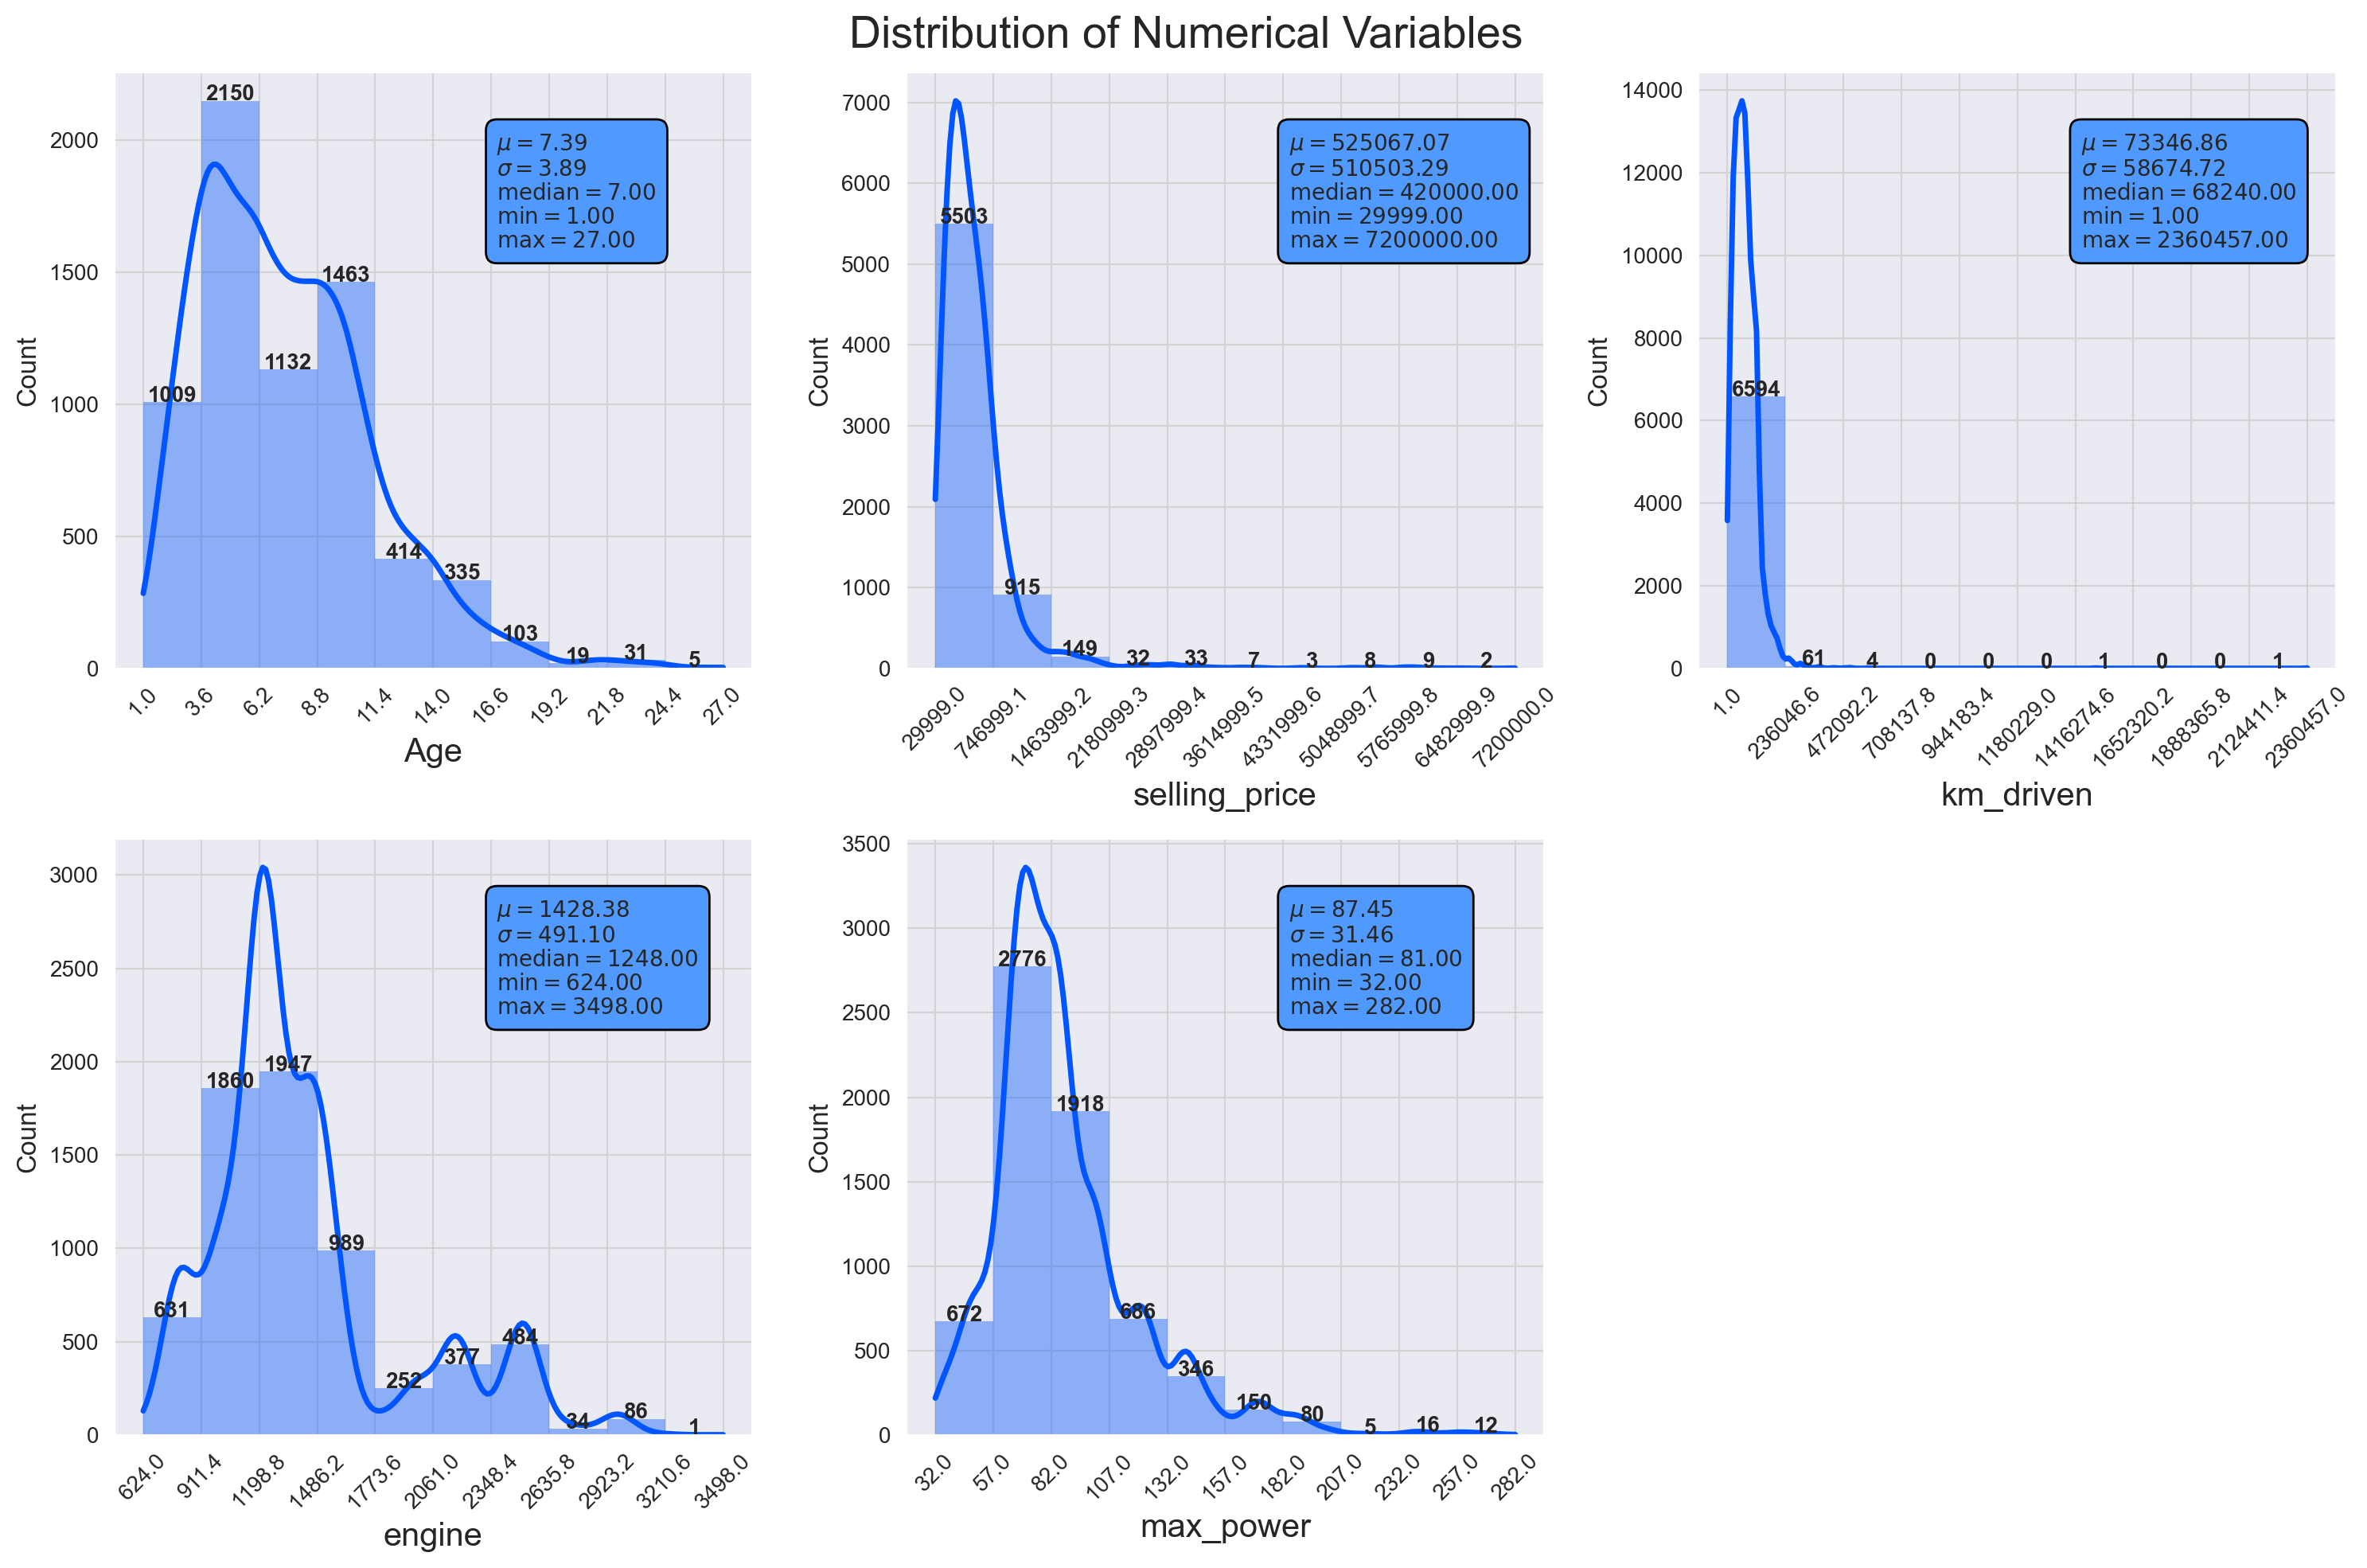

In [270]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10), dpi=200)
c = '#0055ff'

for i in range(len(NumCols)):
    row = i//3
    col = i%3
    values, bin_edges = np.histogram(df1[NumCols[i]], 
                                     range=(np.floor(df1[NumCols[i]].min()), np.ceil(df1[NumCols[i]].max())))                
    graph = sns.histplot(data=df1, x=NumCols[i], bins=bin_edges, kde=True, ax=ax[row,col],
                         edgecolor='none', color=c, alpha=0.4, line_kws={'lw': 2.5})
    ax[row,col].set_xlabel(NumCols[i], fontsize=15)
    ax[row,col].set_ylabel('Count', fontsize=12)
    ax[row,col].set_xticks(np.round(bin_edges,1))
    ax[row,col].set_xticklabels(ax[row,col].get_xticks(), rotation = 45)
    ax[row,col].grid(color='lightgrey')
    for j,p in enumerate(graph.patches):
        ax[row,col].annotate('{}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+1),
                             ha='center', fontsize=10 ,fontweight="bold")
    
    textstr = '\n'.join((
    r'$\mu=%.2f$' %df1[NumCols[i]].mean(),
    r'$\sigma=%.2f$' %df1[NumCols[i]].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df1[NumCols[i]]),
    r'$\mathrm{min}=%.2f$' %df1[NumCols[i]].min(),
    r'$\mathrm{max}=%.2f$' %df1[NumCols[i]].max()
    ))
    ax[row,col].text(0.6, 0.9, textstr, transform=ax[row,col].transAxes, fontsize=10, verticalalignment='top',
                     bbox=dict(boxstyle='round',facecolor='#509aff', edgecolor='black', pad=0.5))
    
ax[1, 2].axis('off')
plt.suptitle('Distribution of Numerical Variables', fontsize=20) 
plt.tight_layout()   
plt.show()

## Target vs. Numerical Features Bivariate Analysis

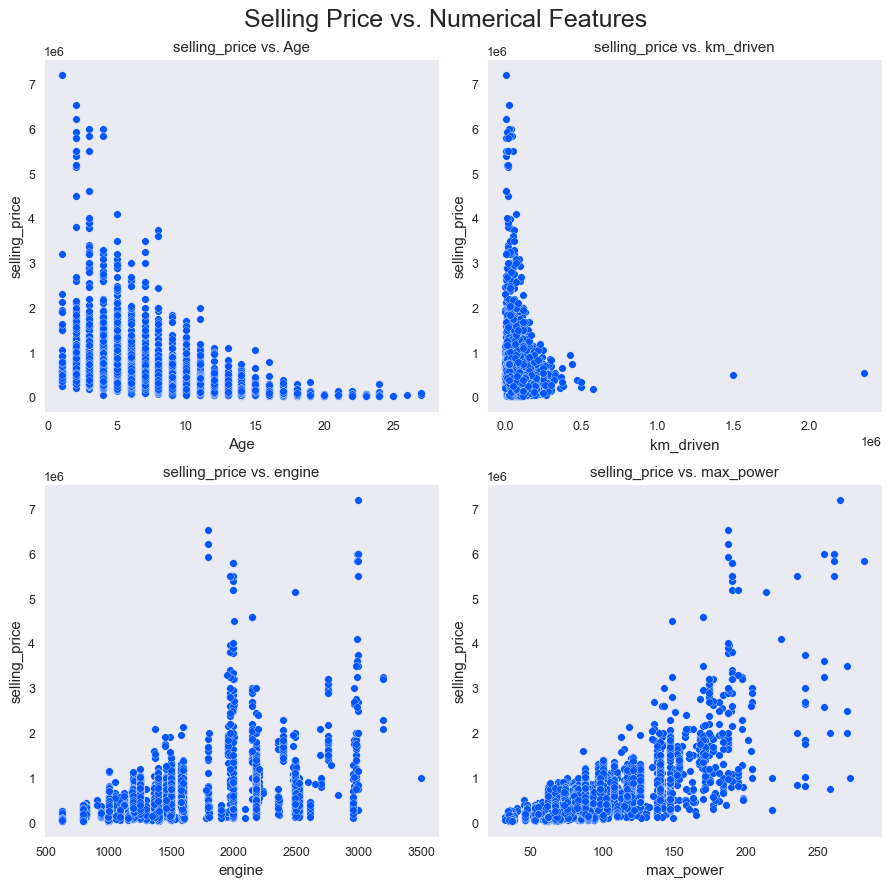

In [272]:
fig, ax = plt.subplots(nrows=2 ,ncols=2, figsize=(10,10), dpi=90)
num_features = ['Age', 'km_driven', 'engine', 'max_power']
target = 'selling_price'
c = '#0055ff'

for i in range(len(num_features)):
    row = i//2
    col = i%2
    ax[row,col].scatter(df1[num_features[i]], df1[target], color=c, edgecolors='w', linewidths=0.25)
    ax[row,col].set_title('{} vs. {}'.format(target, num_features[i]), size = 12)
    ax[row,col].set_xlabel(num_features[i], size = 12)
    ax[row,col].set_ylabel(target, size = 12)
    ax[row,col].grid()

plt.suptitle('Selling Price vs. Numerical Features', size = 20)
plt.tight_layout()
plt.show()

In [281]:
col_names=['Age','km_driven','engine','max_power']
col_vals=['negative','negative','positive','positive']
pd.DataFrame(col_vals,col_names,['selling price'])

,selling price
Age,negative
km_driven,negative
engine,positive
max_power,positive


## Target vs. Categorical Features Bivariate Analysis

In [282]:
CatCols

['fuel', 'seller_type', 'transmission', 'owner', 'seats']

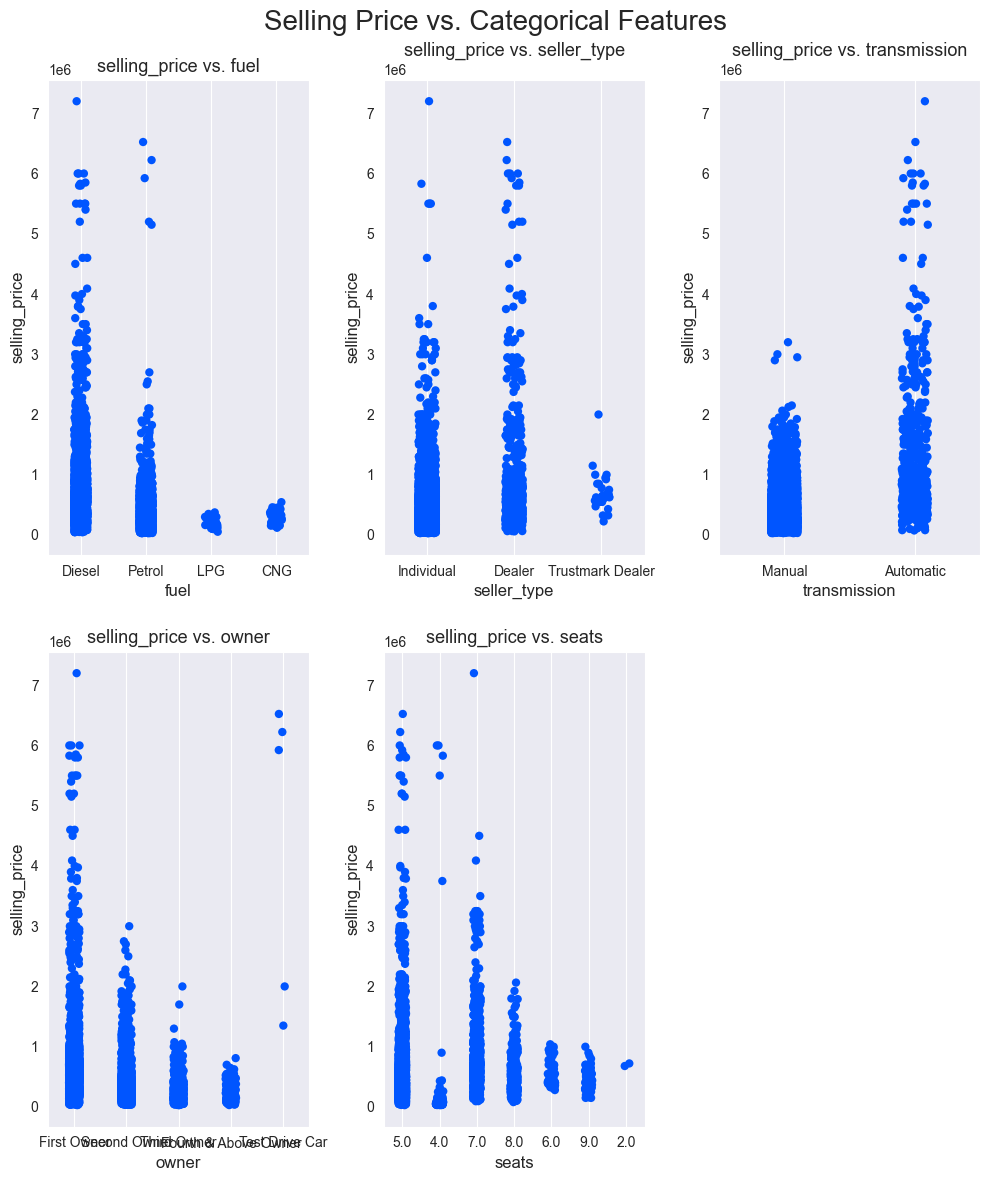

In [291]:
fig, axes = plt.subplots(nrows=2 ,ncols=3, figsize=(10,12), dpi=100)
cat_features = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']
target = 'selling_price'
c = '#0055ff'

for i in range(len(cat_features)):
    row = i//3
    col = i%3
    sns.stripplot(ax=axes[row,col], x=cat_features[i], y=target, data=df1, size=6, color=c)
    axes[row,col].set_title('{} vs. {}'.format(target, cat_features[i]), size = 13)
    axes[row,col].set_xlabel(cat_features[i], size = 12)
    axes[row,col].set_ylabel(target, size = 12)
    axes[row,col].grid()

plt.suptitle('Selling Price vs. Categorical Features', size = 20)
axes[1, 2].axis('off')
plt.tight_layout()
plt.show()

## Multivariate Analysis

In [304]:
df1['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

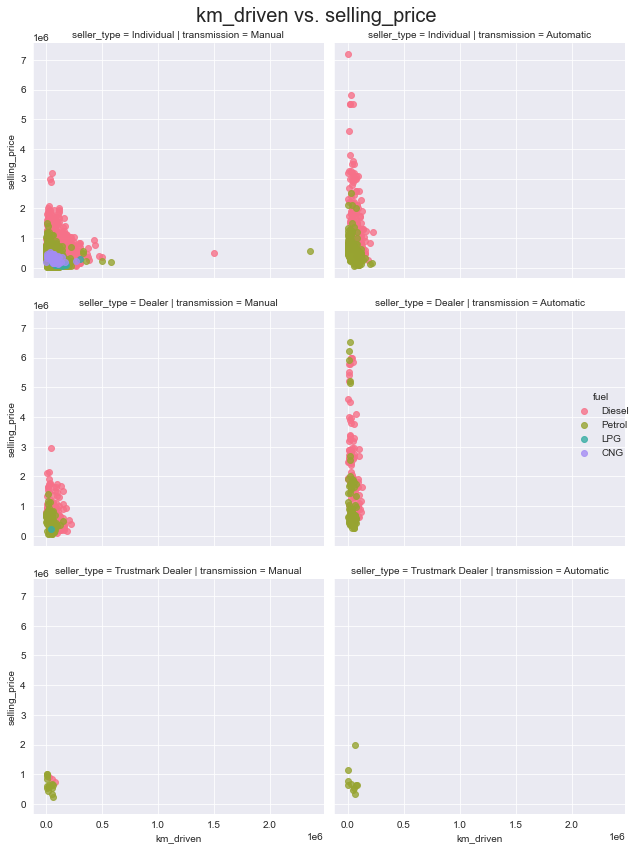

In [318]:
graph = sns.lmplot(x='km_driven', y='selling_price', data= df1, fit_reg=False, row='seller_type',
                   col='transmission', hue='fuel', palette=CustomPalette, height=4, aspect=1)   

plt.suptitle('km_driven vs. selling_price', fontsize=20) 
# sns.move_legend(graph, "lower center", bbox_to_anchor=(1.05, 0.5), ncol=1) #need to upgrade seaborn
plt.tight_layout()
plt.show()

In [ ]:
# LPG and CNG cars -> individual + manual
# almost no Diesel cars sold by Trustmark Dealer
# auto & dealer car tend to have lower km_driven while manual & deal have more km_driven


## Categorical Variables Encoding

In [330]:
CatCols

df2 = pd.get_dummies(df1, columns=CatCols, drop_first=True)
df2.head(5)
df2.rename(columns={'seats_5.0':'seats_5','seats_6.0':'seats_6',\
                   'seats_7.0':'seats_7','seats_8.0':'seats_8',\
                   'seats_9.0':'seats_9'}, inplace=True)

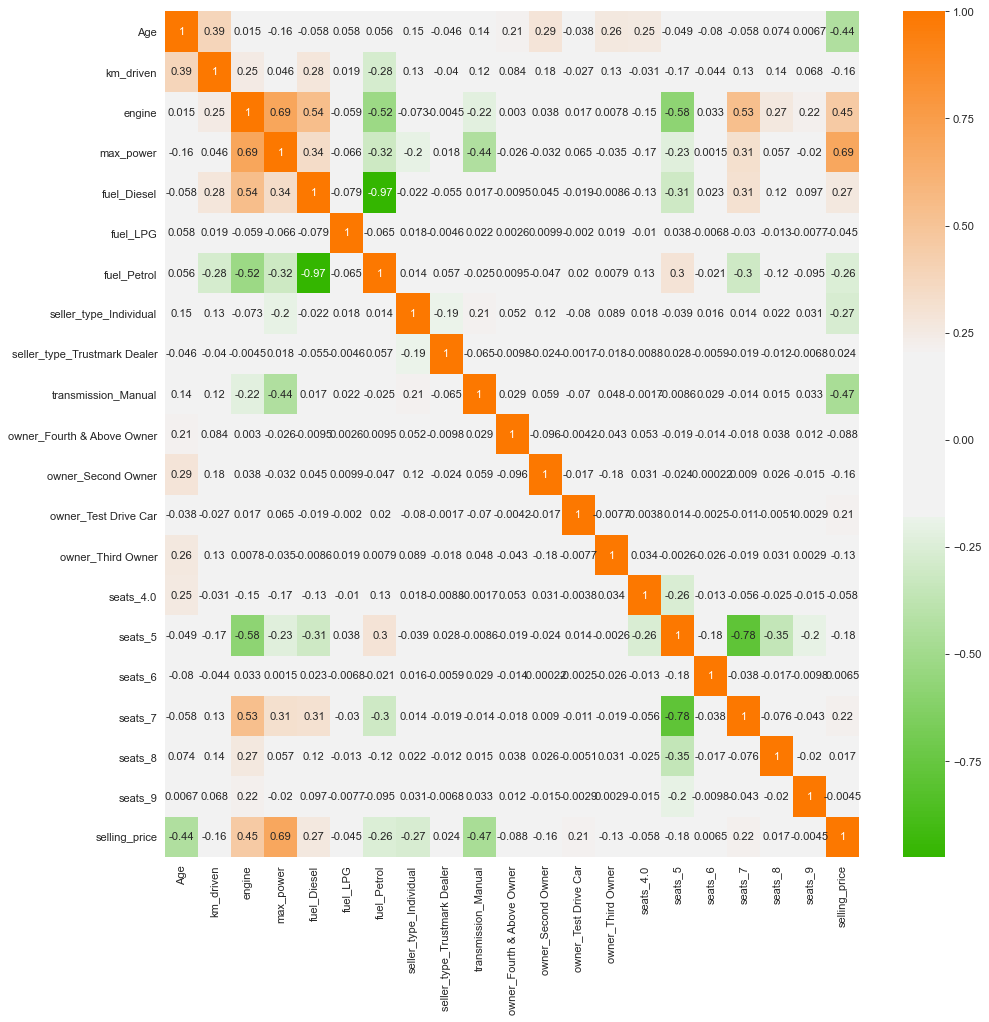

In [335]:
target = 'selling_price'
cmap = sns.diverging_palette(125, 28, s=100, l=65, sep=50, as_cmap=True)
fig, ax = plt.subplots(figsize=(14, 14), dpi=80)
ax = sns.heatmap(pd.concat([df2.drop(target,axis=1), df2[target]],axis=1).corr(), annot=True, cmap=cmap)
plt.show()

In [ ]:
# Multicollinearity: max power and engine are highly correlated -> should drop one of them
